# Context  
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.  

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).  

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.  

# Objective  
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.  

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:  

- Facilitate the process of visa approvals.  
- Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.  

# Data Description  
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.  

- **case_id**: ID of each visa application  
- **continent**: Information of continent the employee  
- **education_of_employee**: Information of education of the employee  
- **has_job_experience**: Does the employee has any job experience? Y= Yes; N = No  
- **requires_job_training**: Does the employee require any job training? Y = Yes; N = No  
- **no_of_employees**: Number of employees in the employer's company  
- **yr_of_estab**: Year in which the employer's company was established  
- **region_of_employment**: Information of foreign worker's intended region of employment in the US.  
- **prevailing_wage**: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.  
- **unit_of_wage**: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.  
- **full_time_position**: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position  
- **case_status**: Flag indicating if the Visa was certified or denied

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,StratifiedKFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [222]:
df = pd.read_csv("D:\Data Science\Module-5_Machine-Learning-2\project\EasyVisa.csv")
data = df.copy()
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [ ]:
df.shape

In [34]:
data.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [224]:
num_cols = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]
cat_cols = [col for col in data.columns if data[col].dtype in ['object', 'category']]
print(cat_cols,num_cols,sep='\n')

['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [58]:
for col in df.columns:
    print(df[col].value_counts(1)*100)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
no_of_employees
183      0.070644
854      0.062794
724      0.062794
766      0.058870
1476     0.058870
           ...   
5876     0.003925
5536     0.003925
47866    0.0039

# 2 **Exploratory Data Analysis**

## 2.1 **Univariate Analysis**

In [103]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="yellow", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="green", linestyle="-"
    )  # Add median to the histogram


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count , 5))
    else:
        plt.figure(figsize=(n , 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


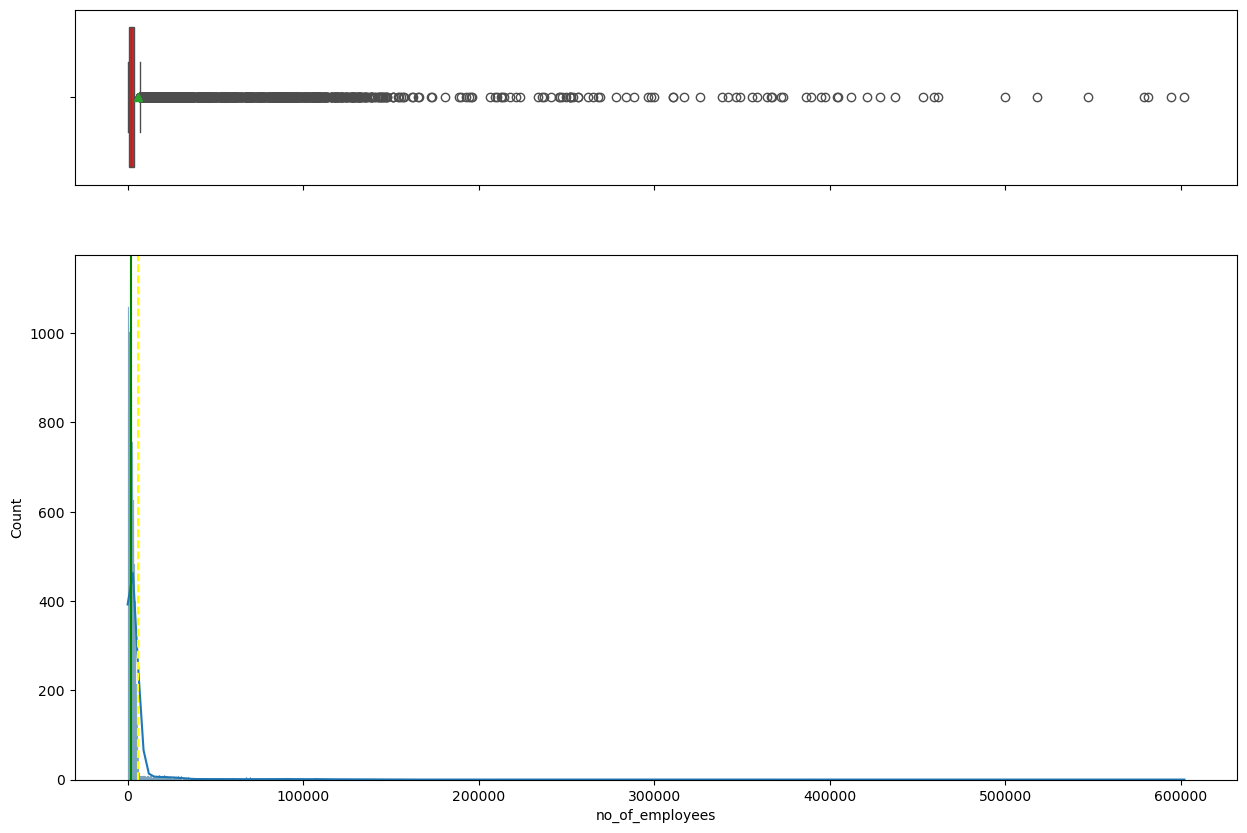

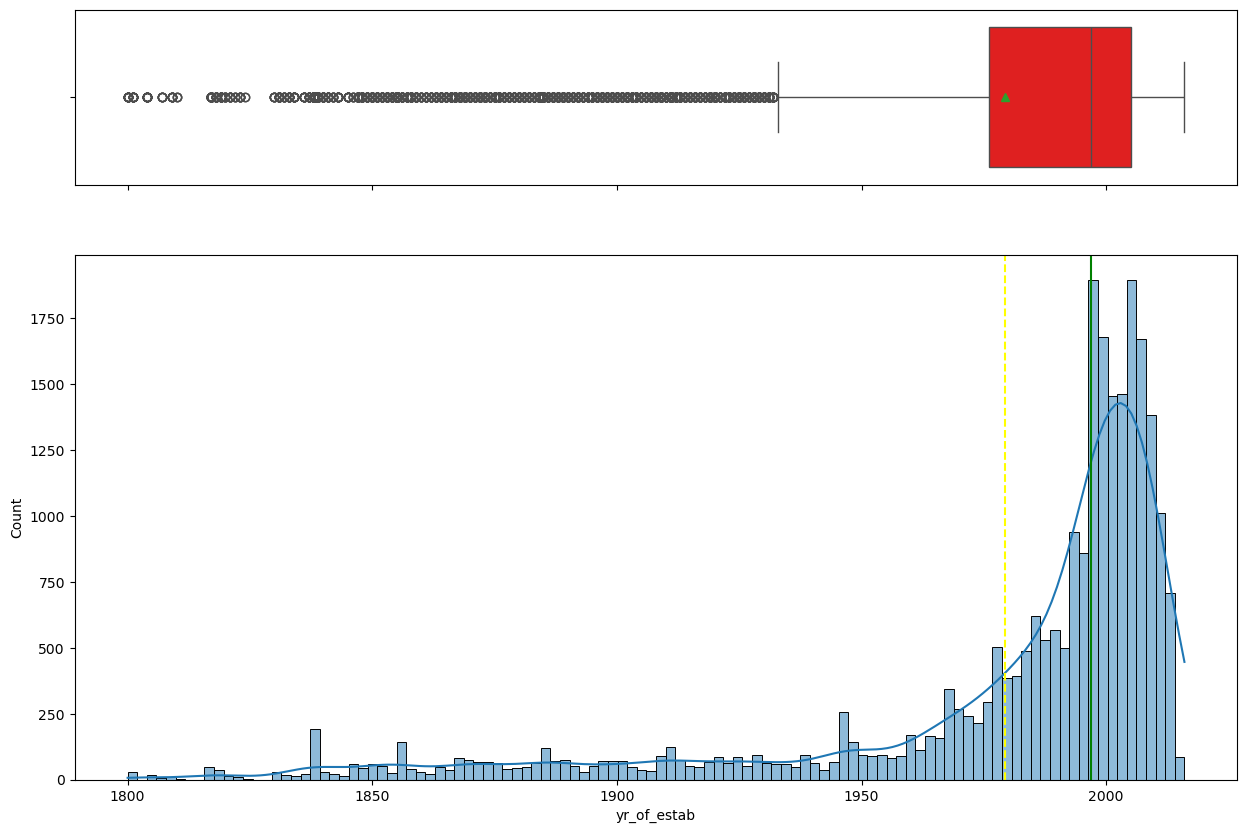

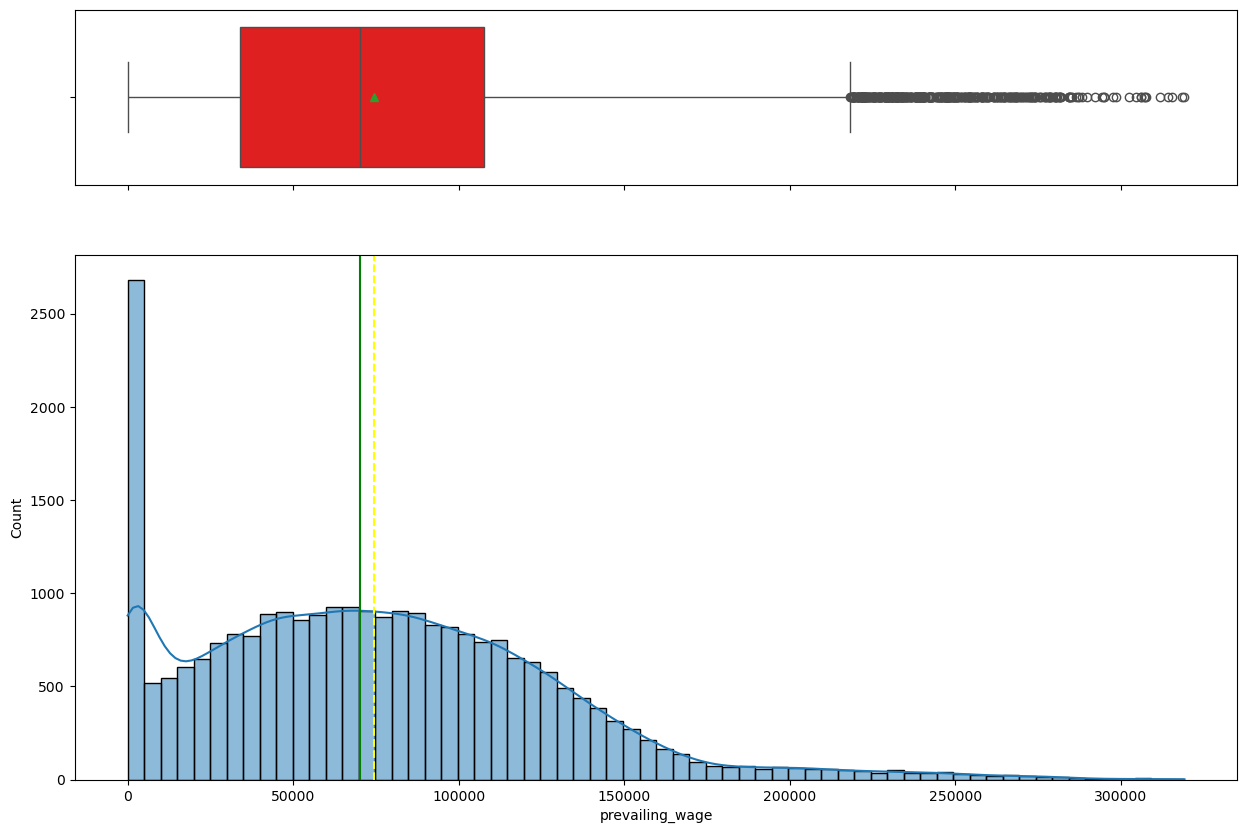

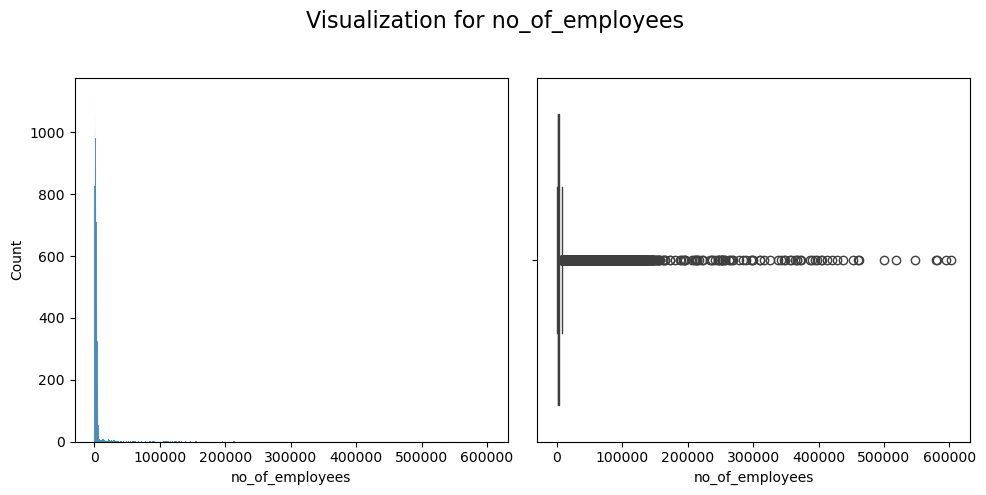

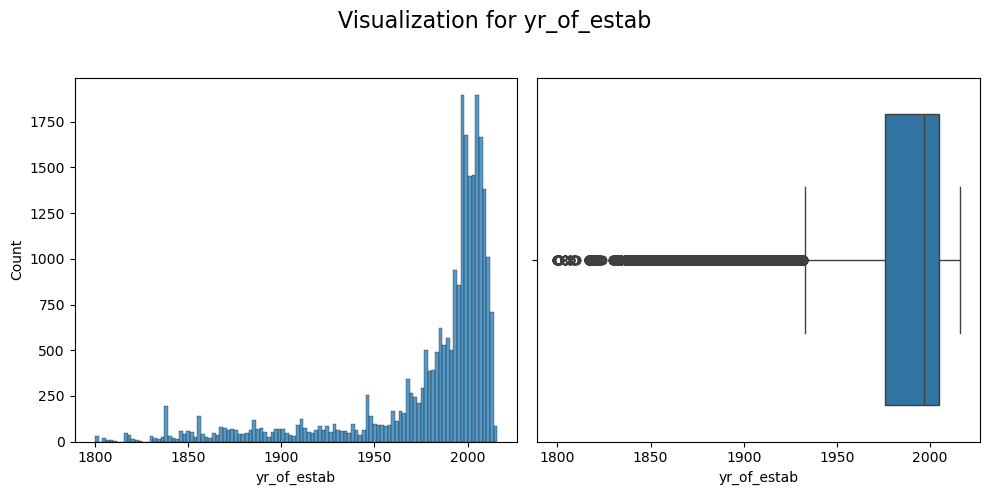

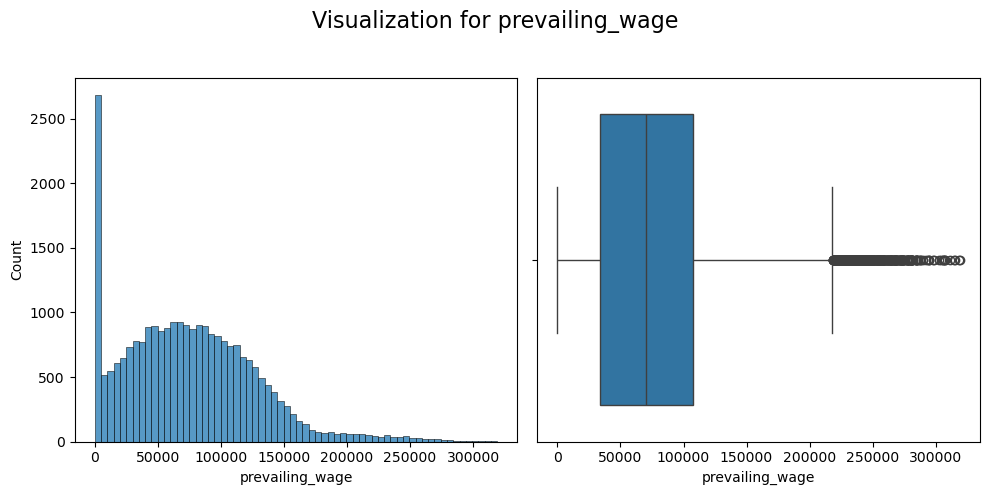

In [67]:
for col in num_cols:
    histogram_boxplot(data, col, kde=True)  # Pass column data and column name
    plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/1_{col}.jpg')          # Use f-string for dynamic filename
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Visualization for {col}", fontsize=16)  # Add a super title
    sns.histplot(data, x=col, ax=ax[0])
    sns.boxplot(data, x=col, ax=ax[1])
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the title

    plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/2_{col}.jpg')

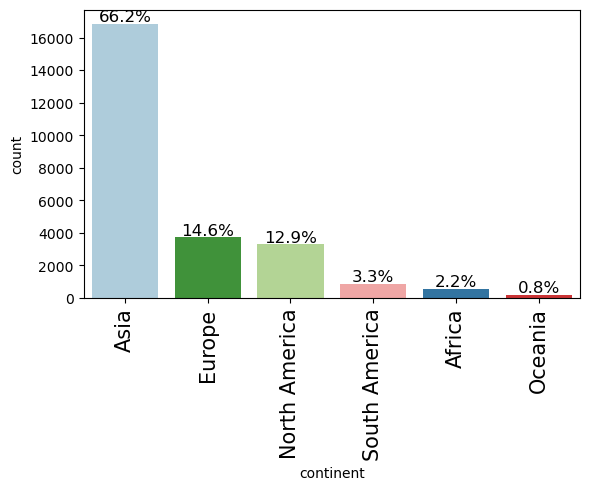

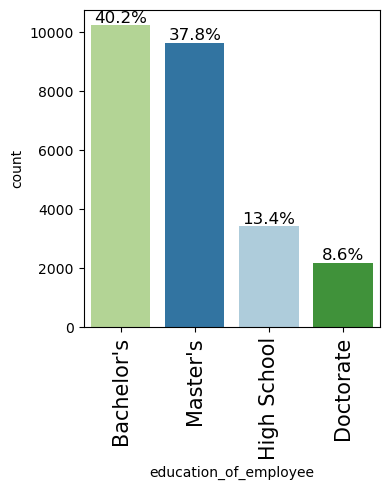

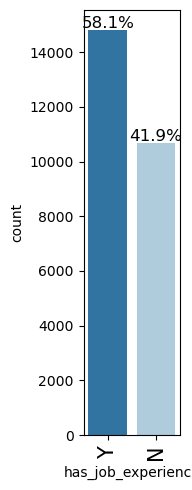

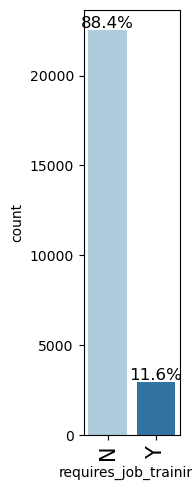

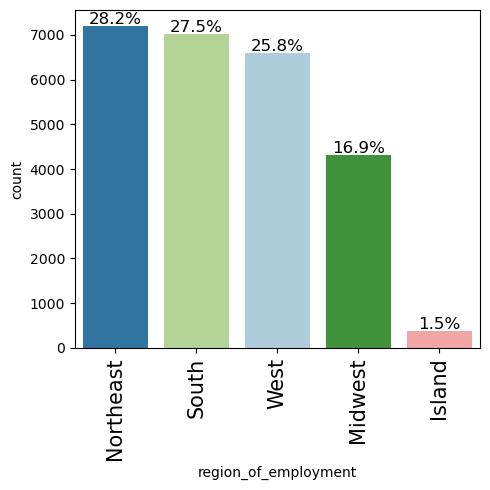

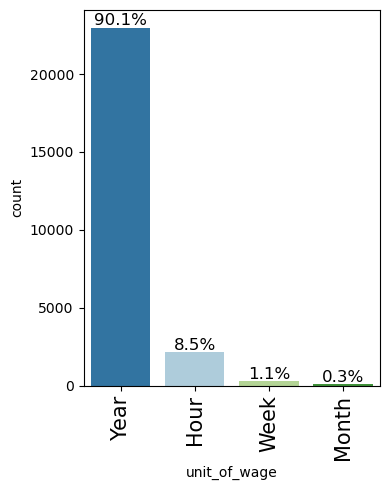

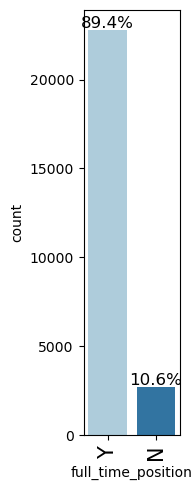

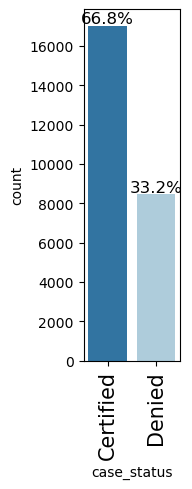

In [113]:
exclude = ['yr_of_estab','case_id','prevailing_wage','no_of_employees']
for cat_col in cat_cols:
    if cat_col not in exclude:
        # plt.figure(figsize=(4, 12))
        labeled_barplot(data,cat_col,perc=True)
        plt.tight_layout()  # Prevent padding issues
        plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/3{cat_col}.jpg',dpi=100)


In [81]:
cat_cols

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

### 2.2 **Bivariate Analysis**

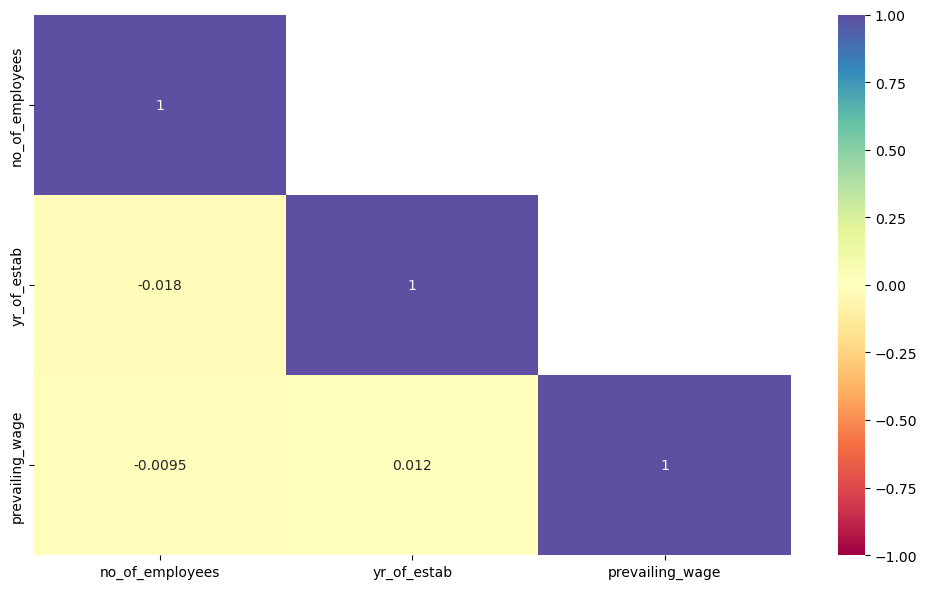

In [136]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(),vmax=+1,vmin=-1, cmap="Spectral",annot=True, mask = np.triu(df[num_cols].corr(), +1))
plt.tight_layout()

# Save the figure with adjusted layout
plt.savefig('D:/Data Science/Module-5_Machine-Learning-2/images_for_project/4.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

<Figure size 1000x600 with 0 Axes>

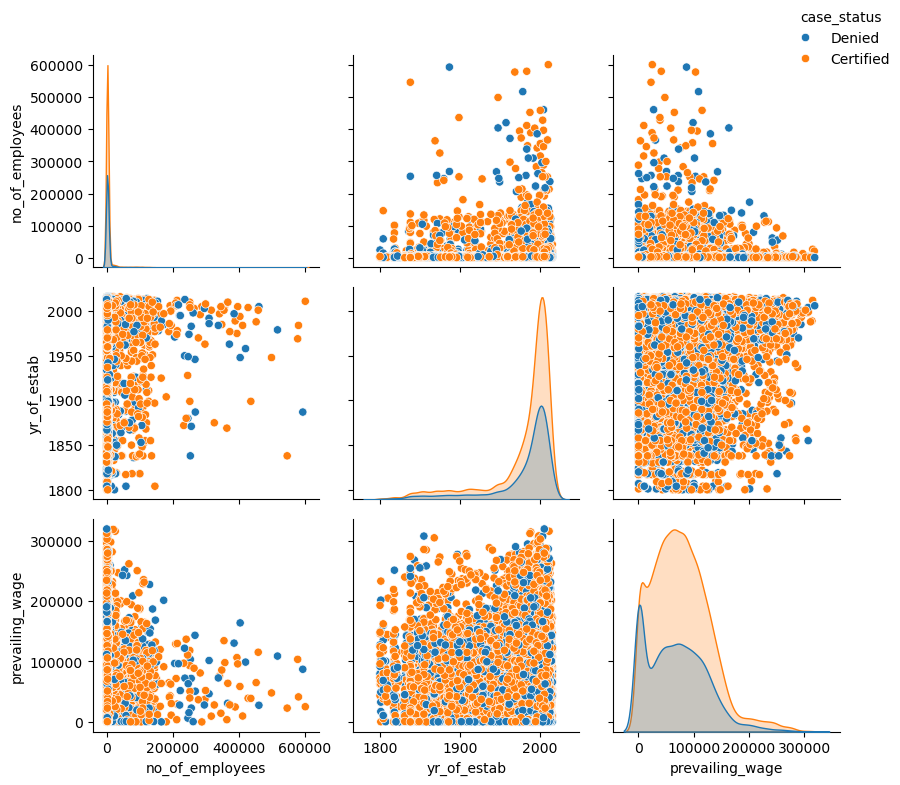

In [152]:


# Assuming `df` is your DataFrame
plt.figure(figsize=(10, 6))

# Create the pairplot and assign it to a variable
pairplot = sns.pairplot(df, diag_kind='kde', hue='case_status')
# Adjust the legend position
pairplot._legend.set_bbox_to_anchor((1.05, 1.05))  # Adjust the x and y position of the legend
pairplot._legend.set_loc('upper right')  # Align the legend to the center-left

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('D:/Data Science/Module-5_Machine-Learning-2/images_for_project/5.jpg', dpi=300, bbox_inches='tight')
plt.show()


**Functions for bivariate analysis**

In [109]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title(f"Distribution of {target} for {target}=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    # plt.show()
    plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/7_{predictor}_{target}.jpg', dpi=300, bbox_inches='tight')





def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)

    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count , 7))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/8_{predictor}_{target}.jpg', dpi=300, bbox_inches='tight')
    # plt.show()


In [12]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

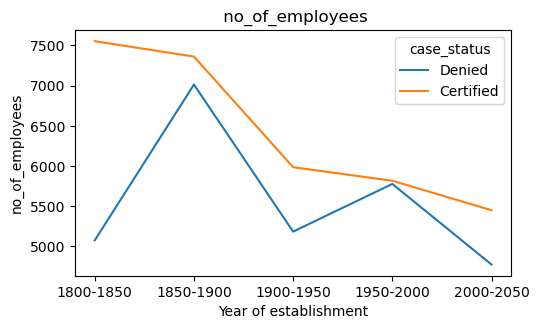

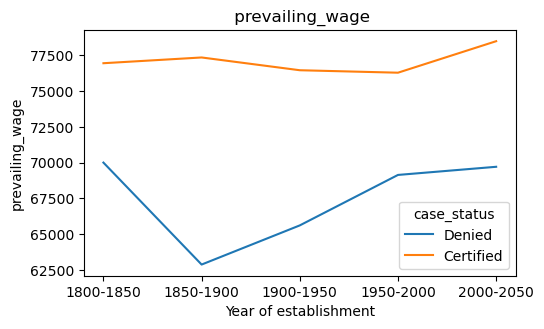

In [244]:
observe = [ 'no_of_employees','prevailing_wage']
# Define bins and labels
bins = list(range(1800, 2100, 50))  # Bin edges from 1800 to 2050 with a step of 50
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]  # Generate labels for bins

# Create a new categorical column
df['yr_category'] = pd.cut(df['yr_of_estab'], bins=bins, labels=labels, right=False)


for i,col in enumerate(observe): 
    plt.figure(figsize=(10,6))
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    sns.lineplot(df,x='yr_category',y=col,hue='case_status',ci=None)
    plt.title(f" {col}")
    plt.xlabel('Year of establishment')
    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/6_{col}.jpg', dpi=300, bbox_inches='tight')


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot_wrt_target(data, predictor1,predictor2, target):
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Correct dimensions

    # Boxplot with outliers
    axs[0].set_title(f"Boxplot of {predictor1} vs {predictor2}")
    sns.boxplot(data=data, x=predictor2, y=predictor1, hue=target,ax=axs[0], palette="gist_rainbow")

    # Boxplot without outliers
    axs[1].set_title(f"Boxplot (without outliers) of {predictor1} vs {predictor2}")
    sns.boxplot(
        data=data,
        x=predictor2,
        y=predictor1,
        ax=axs[1],
        hue=target,
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    return fig  # Return the figure object
observe = ['no_of_employees', 'prevailing_wage']
observe2 = [
    'continent', 'education_of_employee', 'has_job_experience',
    'requires_job_training', 'region_of_employment',
    'unit_of_wage', 'full_time_position'
]

for num in observe:
    for col in observe2:
        # Generate and save box plot
        figure = box_plot_wrt_target(data, num, col, 'case_status')
        figure.savefig(
            f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/10_{num}_{col}.jpg',
            dpi=300,
            bbox_inches='tight'
        )
        plt.close(figure)  # Close the figure to free memory


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------
case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------
case_status         Certified  Denied    All
has_job_experienc

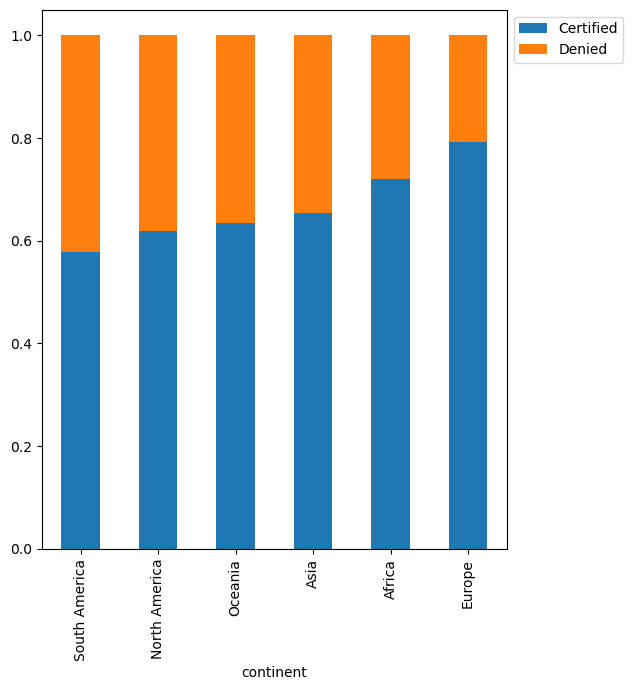

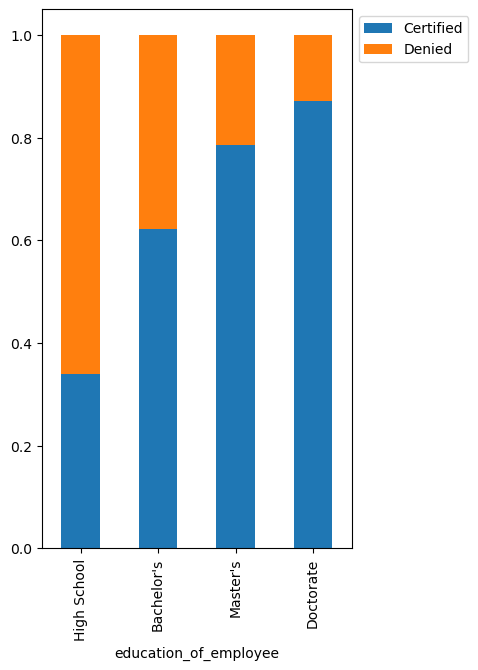

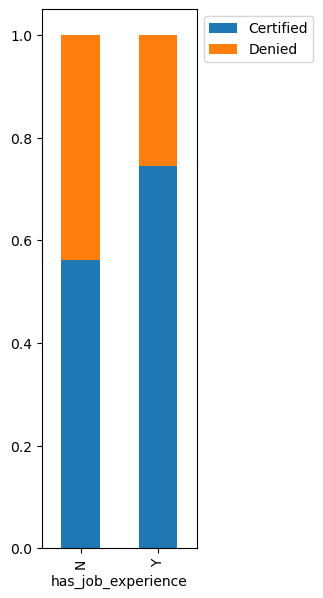

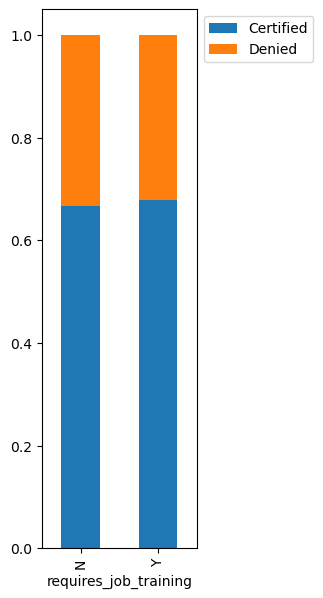

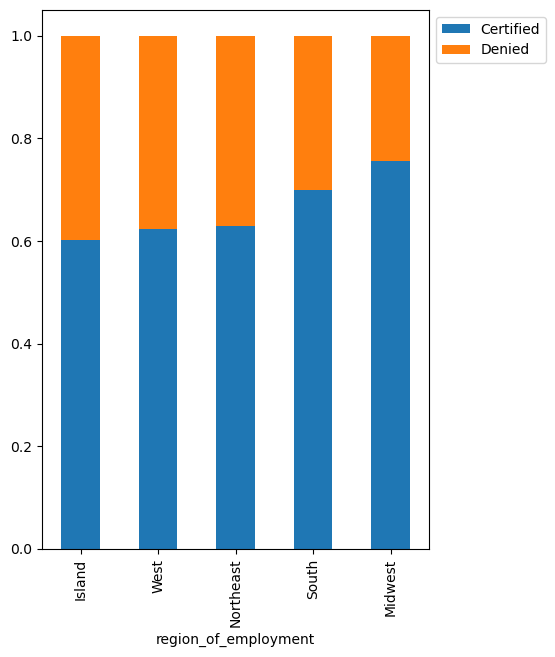

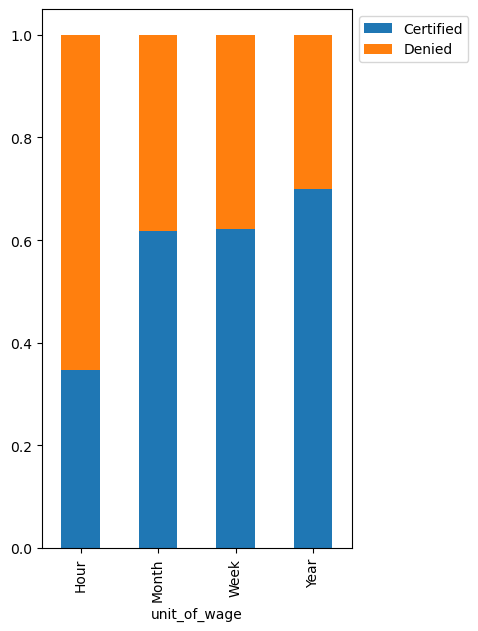

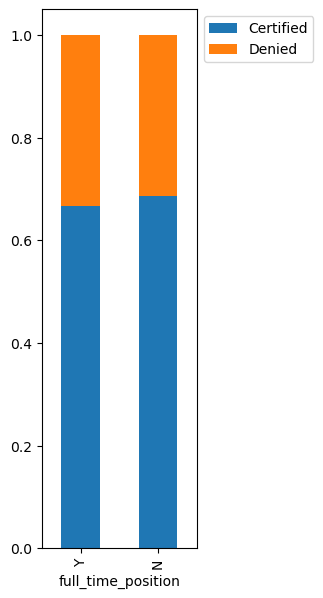

In [111]:
for col in observe2:
    stacked_barplot(data,col,'case_status')
        


# Data preprocessing

I have changed df dataframe so now i am using data dataframe.

In [115]:
df.shape

(25480, 13)

In [117]:
data.shape

(25480, 12)

## Duplicate value check and Missing value treatment

In [137]:
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [123]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [197]:
data.duplicated().sum()

0

**A company which has been in the business for a long duration is more trustworthy than the newly established ones. So let us calculate the current age of the company and incorporate that in our model.**

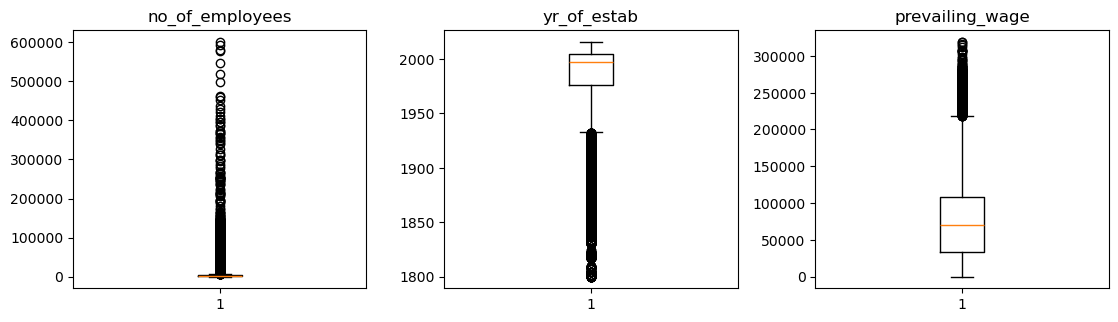

In [226]:

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [227]:
data['Age_of_company'] = 2025 - data['yr_of_estab']
data.drop('yr_of_estab',axis=1,inplace=True)

## Observations

There are quite a few outliers in the data.
However, we will not treat them as they are proper values.

## Data Preparation for modeling




In [230]:
data.drop('case_id',axis=1,inplace=True)
replacestruc = {'Certified':1,'Denied':0}
data['case_status']= data['case_status'].replace(replacestruc)
print(data)
x = data.drop('case_status',axis=1)
y= data['case_status']
x_temp,x_test,y_temp,y_test = train_test_split(x,y,stratify=y,test_size=0.2)
x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,stratify=y_temp,test_size=0.25)
x_train = pd.get_dummies(x_train,drop_first=True)
x_test = pd.get_dummies(x_test,drop_first=True).reindex(columns =x_train.columns,fill_value=0)
x_val = pd.get_dummies(x_val,drop_first=True).reindex(columns =x_train.columns,fill_value=0)
# Align the columns of the encoded x_test with the columns of x_train (training data).
# If any columns in x_train are missing in x_test, they will be added with the value specified by fill_value (0).
# If any columns in x_test are not in x_train, they will be dropped.

      continent education_of_employee has_job_experience  \
0          Asia           High School                  N   
1          Asia              Master's                  Y   
2          Asia            Bachelor's                  N   
3          Asia            Bachelor's                  N   
4        Africa              Master's                  Y   
...         ...                   ...                ...   
25475      Asia            Bachelor's                  Y   
25476      Asia           High School                  Y   
25477      Asia              Master's                  Y   
25478      Asia              Master's                  Y   
25479      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees region_of_employment  \
0                         N            14513                 West   
1                         N             2412            Northeast   
2                         Y            44444                 West   
3  

# Encoding Categorical Data: Is It Necessary?

## **1. When Encoding is Not Necessary**
You don't need to encode categorical data if you're using **tree-based models**, such as:
- Decision Trees
- Random Forests
- Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)

### Tree-based Model Considerations:
- These models can handle categorical features directly.
- Some libraries (like LightGBM and CatBoost) have native support for categorical data.
- For libraries requiring explicit settings, convert categorical columns to the **pandas categorical data type**.

Example:
```python
df['continent'] = df['continent'].astype('category')
df['has_job_experience'] = df['has_job_experience'].astype('category')


# Model Building - Original Data

### Model evaluation criterion
# Understanding the Classification Problem

### Positive Class:
- Likely **"Certified"** visas (visa approval).

### Negative Class:
- Likely **"Denied"** visas.

---

### Types of Errors:
1. **False Positive (FP)**:
   - A visa that should have been **denied** is predicted as **certified**.
   - **Consequence**: Leads to unnecessary processing costs and wasted resources on invalid applications.

2. **False Negative (FN)**:
   - A visa that should have been **certified** is predicted as **denied**.
   - **Consequence**: Could result in losing qualified applicants and failing to meet workforce demands.

---

### Metric Choice:
For this case, tuning for the **F1 score** is likely the best initial approach as it balances:
- **Precision**: Minimizing the number of false positives.
- **Recall**: Minimizing the number of false negatives.

The F1 score ensures the model performs well for both the positive and negative classes, which is crucial in addressing the imbalance and reducing the cost of errors.



In [235]:
data['case_status'].value_counts(1)*100

case_status
1    66.789639
0    33.210361
Name: proportion, dtype: float64

In [236]:
models= []
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("LRegression", LogisticRegression(random_state=1)))
results=[]
names=[]
score=[]
print('Cross validation performance:''\n')

# Use KFold:
# - For regression problems (no classes).
# - For balanced datasets where class proportions are already uniform.

# Use StratifiedKFold:
# - For classification problems, especially when the dataset is imbalanced.
# - To avoid bias in model evaluation due to skewed class proportions in the test folds.

for name,model in models:
    kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    cv_result = cross_val_score(estimator= model,X=x_train,y=y_train,cv=kfold,scoring='f1')
    results.append(cv_result)
    names.append(name)
    print(f'{name:<15}: {cv_result.mean():.4f} ')

Cross validation performance:

Bagging        : 0.7694 
Random forest  : 0.8041 
GBM            : 0.8222 
Adaboost       : 0.8148 
Xgboost        : 0.8040 
dtree          : 0.7426 
LRegression    : 0.8136 


In [237]:

for name,model in models:
    model.fit(x_train,y_train)
    scores = f1_score(y_val, model.predict(x_val))
    score.append(scores)
    print(f"Model - {name:<15}: F1 Score - {scores:.4f}")

Model - Bagging        : F1 Score - 0.7706
Model - Random forest  : F1 Score - 0.7960
Model - GBM            : F1 Score - 0.8214
Model - Adaboost       : F1 Score - 0.8153
Model - Xgboost        : F1 Score - 0.8036
Model - dtree          : F1 Score - 0.7422
Model - LRegression    : F1 Score - 0.8132


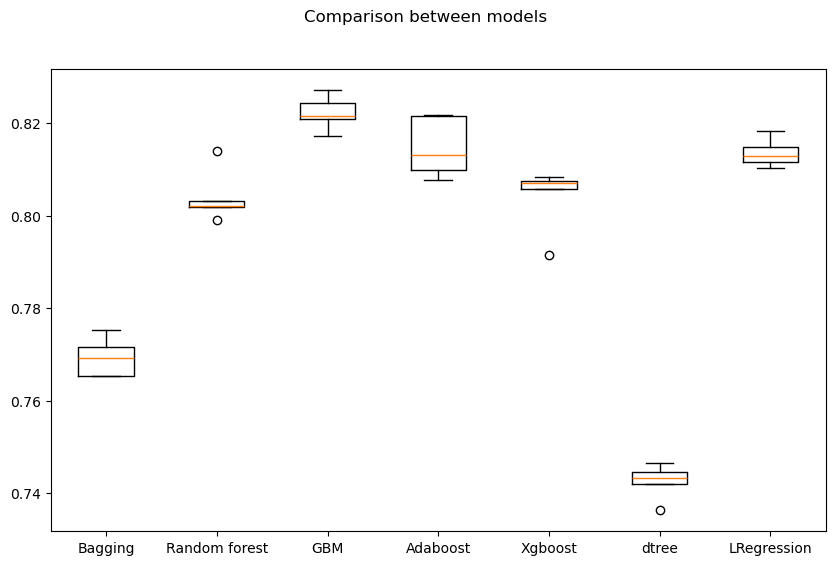

In [238]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Comparison between models')
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/compare_models.jpg', dpi=300, bbox_inches='tight')

- We can see that the GBM is giving the highest cross-validated f1 score followed by Adaboost and Logistic Regression
- The boxplot shows that the performance of GBM and Adaboost is consistent and their performance on the validation set is also good
- We will tune the best three models i.e. GBM, Adaboost &  Xgboost  and see if the performance improveses

# Model Building - Oversampled Data

In [242]:
sm = SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
x_train_over , y_train_over = sm.fit_resample(x_train,y_train)

results_over = []
print('Cross validation performance on oversampled data:''\n')
for name,model in models:
    kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    cv_result = cross_val_score(estimator= model,X=x_train_over,y=y_train_over,cv=kfold,scoring='f1')
    results_over.append(cv_result)
    print(f'{name:<15}: {cv_result.mean():.4f} ')

scores_over =[]
for name,model in models:
    model.fit(x_train_over , y_train_over)
    score_over = f1_score(y_val,model.predict(x_val))
    scores_over.append(score_over)
    print(f"Model - {name:<15}: F1 Score - {score_over:.4f}")

Cross validation performance on oversampled data:

Bagging        : 0.7583 
Random forest  : 0.7923 
GBM            : 0.8028 
Adaboost       : 0.7970 
Xgboost        : 0.7945 
dtree          : 0.7216 
LRegression    : 0.7484 
Model - Bagging        : F1 Score - 0.7571
Model - Random forest  : F1 Score - 0.7882
Model - GBM            : F1 Score - 0.8185
Model - Adaboost       : F1 Score - 0.8146
Model - Xgboost        : F1 Score - 0.8057
Model - dtree          : F1 Score - 0.7262
Model - LRegression    : F1 Score - 0.7828


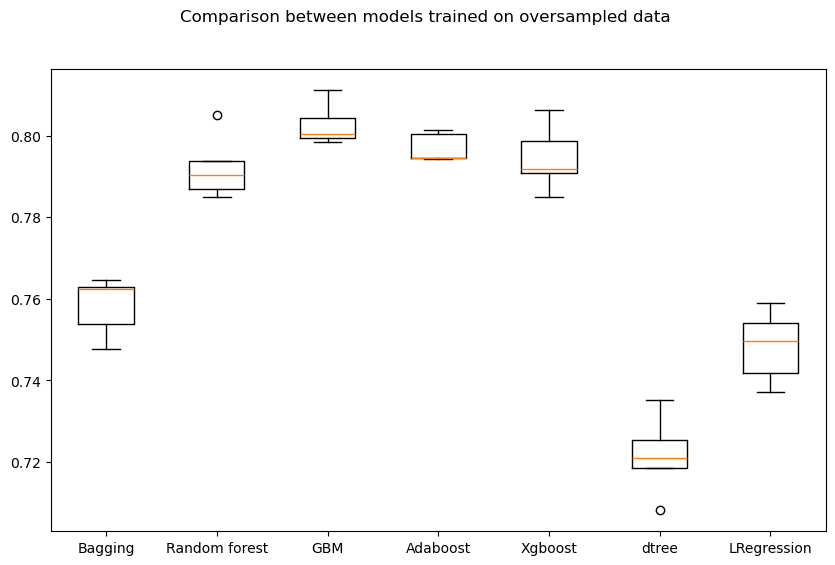

In [243]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Comparison between models trained on oversampled data')
ax = fig.add_subplot(111)
plt.boxplot(results_over)
ax.set_xticklabels(names)
plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/compare_models_over.jpg', dpi=300, bbox_inches='tight')

- We can see that the GBM is giving the highest cross-validated f1 score followed by Adaboost and xgboost
- The boxplot shows that the performance of GBM and Adaboost is consistent and their performance on the validation set is also good
- We will tune the best three models i.e. GBM, Adaboost &  xgboost and see if the performance improves

# Model Building - Undersampled Data

Cross validation performance on undersampled data:

Bagging        : 0.6389 
Random forest  : 0.6762 
GBM            : 0.7052 
Adaboost       : 0.6964 
Xgboost        : 0.6765 
dtree          : 0.6319 
LRegression    : 0.6854 
Model - Bagging        : F1 Score - 0.6976
Model - Random forest  : F1 Score - 0.7359
Model - GBM            : F1 Score - 0.7621
Model - Adaboost       : F1 Score - 0.7601
Model - Xgboost        : F1 Score - 0.7470
Model - dtree          : F1 Score - 0.6884
Model - LRegression    : F1 Score - 0.7438


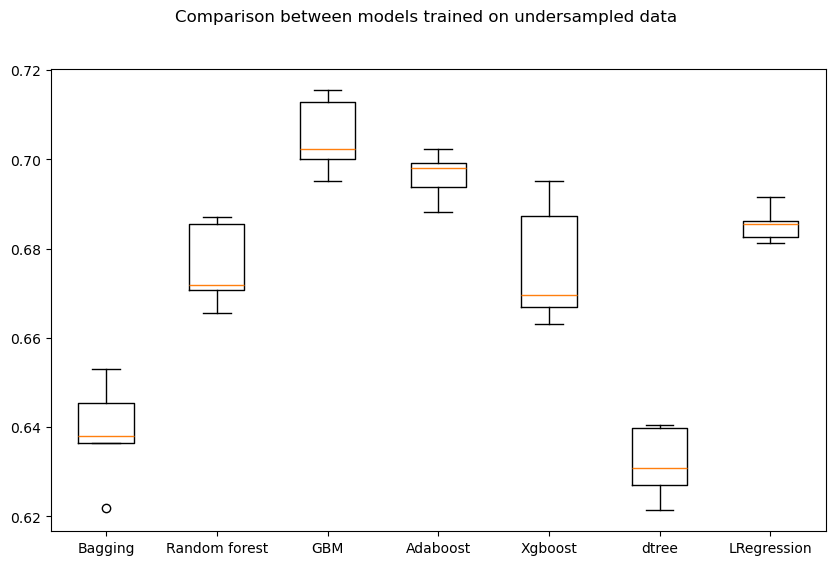

In [246]:
undersample = RandomUnderSampler(random_state=1)
x_train_under,y_train_under = undersample.fit_resample(x_train,y_train)

results_under = []
print('Cross validation performance on undersampled data:''\n')
for name,model in models:
    kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
    cv_result = cross_val_score(estimator= model,X=x_train_under,y=y_train_under,cv=kfold,scoring='f1')
    results_under.append(cv_result)
    print(f'{name:<15}: {cv_result.mean():.4f} ')

scores_under =[]
for name,model in models:
    model.fit(x_train_under , y_train_under)
    score_under = f1_score(y_val,model.predict(x_val))
    scores_under.append(score_under)
    print(f"Model - {name:<15}: F1 Score - {score_under:.4f}")

fig = plt.figure(figsize=(10,6))
fig.suptitle('Comparison between models trained on undersampled data')
ax = fig.add_subplot(111)
plt.boxplot(results_under)
ax.set_xticklabels(names)
plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/compare_models_under.jpg', dpi=300, bbox_inches='tight')

- We can see that the GBM is giving the highest cross-validated f1 score followed by Adaboost and Logistic Regression
- The boxplot shows that the performance of GBM and Adaboost is consistent and their performance on the validation set is also good
- We will tune the best three models i.e. GBM, Adaboost &  Logistic Regression and see if the performance improves

### Hence from all the 7 methods of model bulding we found the top 4 models with highest f1 score are:
- Gradient Boosting Classifier
- AdaBoost
- XgBoost
- Logistic Regression

## Model Performance Improvement using Hyperparameter Tuning

**We will tune Gradient Boosting Classifier,AdaBoost,Logistic Regression and xgboost models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

In [251]:
def model_performance_evaluation(model,predictors,target):
    pred = model.predict(predictors)
    # defining a function to compute different metrics to check performance of a classification model built using sklearn
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Gradient Boosting Classifier

#### GridSearchCV

In [254]:
model = GradientBoostingClassifier(random_state =1)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Step size shrinking
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'subsample': [0.7,  0.9, 1.0],  # Fraction of samples used for fitting each base learner
    'max_features': [ 'sqrt', 'log2']  # Number of features to consider for the best split
}
scorer= metrics.make_scorer(metrics.f1_score)
gridsearch = GridSearchCV(estimator = model,scoring = scorer,param_grid = param_grid,cv=5,n_jobs=-1,verbose=2)
import time
start_time = time.time()
gridsearch.fit(x_train,y_train)
print(f"Single fit time: {time.time() - start_time:.2f} seconds")
print(f'{gridsearch.best_params_},{gridsearch.best_score_}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Single fit time: 571.41 seconds
{'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.9},0.825628223603603


Training performance:
   Accuracy    Recall  Precision       F1
0  0.757718  0.923506   0.763358  0.83583
Testing performance:
   Accuracy    Recall  Precision        F1
0  0.740973  0.912456   0.752422  0.824748


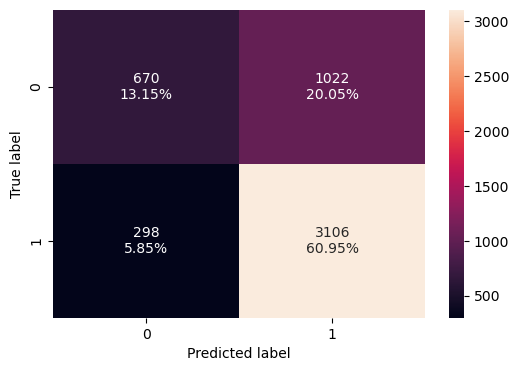

In [255]:
 # Evaluate the best model on the entire dataset
GB_tuned1 = gridsearch.best_estimator_
GB_tuned1.fit(x_train,y_train)

GB_tuned1_train = model_performance_evaluation(
    GB_tuned1, x_train, y_train
)
print("Training performance:")
print(GB_tuned1_train) 
GB_tuned1_test = model_performance_evaluation(
    GB_tuned1, x_val, y_val
)
print('Testing performance:')
print(GB_tuned1_test) 
# creating confusion matrix
confusion_matrix_sklearn(GB_tuned1, x_val, y_val)

#### RandomizedSearchCV

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.01}
Best Cross-Validation Score: 0.8250069629432805
Training performance:
   Accuracy    Recall  Precision        F1
0  0.761316  0.918609    0.76896  0.837149
Testing performance:
   Accuracy    Recall  Precision        F1
0  0.744309  0.903937   0.759191  0.825265


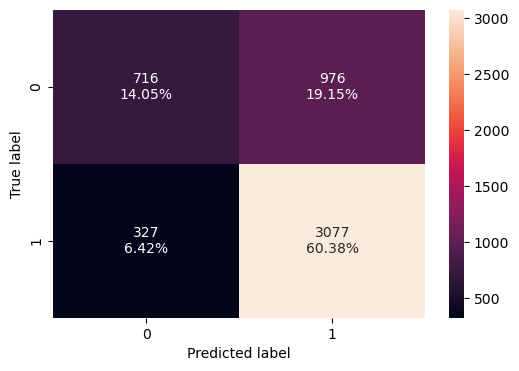

In [295]:
gbc = GradientBoostingClassifier(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Step size shrinking
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'subsample': [0.7,  0.9, 1.0],  # Fraction of samples used for fitting each base learner
    'max_features': [ 'sqrt', 'log2']  # Number of features to consider for the best split
}
scorer = metrics.make_scorer(metrics.f1_score)
# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=50,                  # Number of parameter settings sampled
    scoring=scorer,         # Evaluation metric
    cv=5,                       # Number of cross-validation folds
    random_state=1,            # Ensures reproducibility
    verbose=2,                  # Output progress information
    n_jobs=-1                   # Use all available CPU cores
)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

# Print best parameters and corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Evaluate the best model on the entire dataset
GB_tuned2 = random_search.best_estimator_
GB_tuned2.fit(x_train,y_train)

GB_tuned2_train = model_performance_evaluation(
    GB_tuned2, x_train, y_train
)
print("Training performance:")
print(GB_tuned2_train) 
GB_tuned2_test = model_performance_evaluation(
    GB_tuned2, x_val, y_val
)
print('Testing performance:')
print(GB_tuned2_test) 
# creating confusion matrix
confusion_matrix_sklearn(GB_tuned2, x_val, y_val)

#### AdaBoost

#### GridSearchCV

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Single fit time: 226.13 seconds
Best Parameters: {'estimator__max_depth': 3, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 50}
Best F1 Score: 0.8223994673906152
Training Performance:
   Accuracy   Recall  Precision        F1
0  0.751897  0.88335   0.776095  0.826256
Testing Performance:
   Accuracy    Recall  Precision       F1
0   0.74843  0.877203   0.775584  0.82327


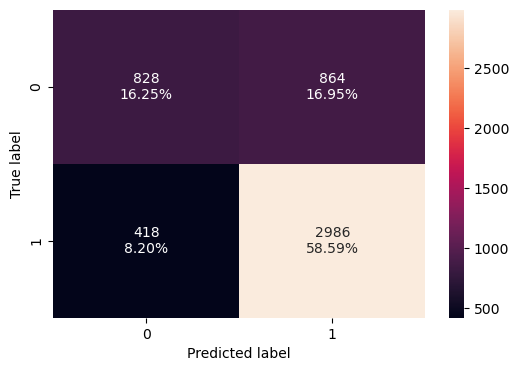

In [260]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import time

# Define the base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=1)

# Define the AdaBoost model with the base estimator
model = AdaBoostClassifier(estimator=base_estimator, random_state=1)

# Define the hyperparameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate for weight updates
    'estimator__max_depth': [1, 2, 3],  # Maximum depth of the base decision tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

# Define the scorer for F1 score
scorer = metrics.make_scorer(metrics.f1_score)

# Perform GridSearchCV with cross-validation
gridsearch = GridSearchCV(estimator=model, scoring=scorer, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Measure the time taken for grid search
start_time = time.time()
gridsearch.fit(x_train, y_train)
print(f"Single fit time: {time.time() - start_time:.2f} seconds")
print(f'Best Parameters: {gridsearch.best_params_}')
print(f'Best F1 Score: {gridsearch.best_score_}')

# Retrieve the best estimator and fit on the training data
AB_tuned1 = gridsearch.best_estimator_
AB_tuned1.fit(x_train, y_train)

# Evaluate model performance on training data
AB_tuned1_train = model_performance_evaluation(AB_tuned1, x_train, y_train)
print("Training Performance:")
print(AB_tuned1_train)

# Evaluate model performance on validation data
AB_tuned1_test = model_performance_evaluation(AB_tuned1, x_val, y_val)
print("Testing Performance:")
print(AB_tuned1_test)

# Create the confusion matrix for the validation data
confusion_matrix_sklearn(AB_tuned1, x_val, y_val)


#### RandomizedSearchCV

Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV fitting time: 195.42 seconds
Best Parameters: {'n_estimators': 50, 'learning_rate': 0.1, 'estimator__min_samples_split': 5, 'estimator__max_depth': 3}
Best Cross-Validation Score: 0.8223994673906152
Training Performance:
   Accuracy    Recall  Precision        F1
0  0.751766  0.883741   0.775772  0.826244
Testing Performance:
   Accuracy    Recall  Precision        F1
0  0.748823  0.878378   0.775415  0.823691


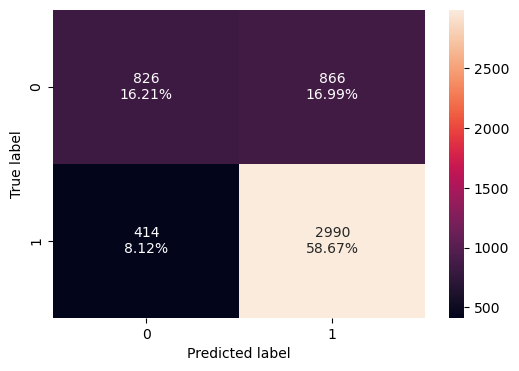

In [297]:
# Define the base estimator (Decision Tree)
estimator = DecisionTreeClassifier(random_state=1)

# Define the AdaBoost model with the base estimator
model = AdaBoostClassifier(estimator=estimator, random_state=1)

# Define the hyperparameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate for weight updates
    'estimator__max_depth': [1, 2, 3],  # Maximum depth of the base decision tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}
# Define the scorer for F1 score
scorer = metrics.make_scorer(metrics.f1_score)
# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,                  # Number of parameter settings sampled
    scoring=scorer,         # Evaluation metric
    cv=5,                       # Number of cross-validation folds
    random_state=1,             # Ensures reproducibility
    verbose=2,                  # Output progress information
    n_jobs=-1                   # Use all available CPU cores
)

# Measure the time taken for randomized search
start_time = time.time()
random_search.fit(x_train, y_train)
print(f"RandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# Print best parameters and corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Retrieve the best estimator and fit on the training data
AB_tuned2 = random_search.best_estimator_
AB_tuned2.fit(x_train, y_train)

# Evaluate model performance on training data
AB_tuned2_train = model_performance_evaluation(AB_tuned2, x_train, y_train)
print("Training Performance:")
print(AB_tuned2_train)

# Evaluate model performance on validation data
AB_tuned2_test = model_performance_evaluation(AB_tuned2, x_val, y_val)
print("Testing Performance:")
print(AB_tuned2_test)

# Create the confusion matrix for the validation data
confusion_matrix_sklearn(AB_tuned2, x_val, y_val)

### Xgboost

#### GridSearchCV

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Single fit time: 421.07 seconds
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score: 0.8263105026356982
Training Performance:
   Accuracy    Recall  Precision        F1
0  0.748299  0.920274   0.755913  0.830035
Testing Performance:
   Accuracy   Recall  Precision       F1
0  0.739207  0.91275   0.750664  0.82381


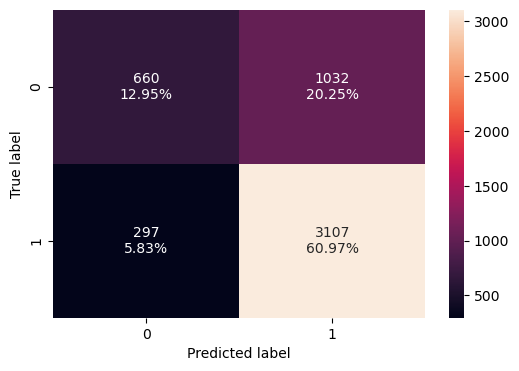

In [265]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import time

# Define the XGBoost model
model = XGBClassifier(random_state=1)

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features used for each tree
}

# Define the scorer for F1 score
scorer = metrics.make_scorer(metrics.f1_score)

# Perform GridSearchCV with cross-validation
gridsearch = GridSearchCV(estimator=model, scoring=scorer, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Measure the time taken for grid search
start_time = time.time()
gridsearch.fit(x_train, y_train)
print(f"Single fit time: {time.time() - start_time:.2f} seconds")
print(f'Best Parameters: {gridsearch.best_params_}')
print(f'Best F1 Score: {gridsearch.best_score_}')

# Retrieve the best estimator and fit on the training data
XGB_tuned1 = gridsearch.best_estimator_
XGB_tuned1.fit(x_train, y_train)

# Evaluate model performance on training data
XGB_tuned1_train = model_performance_evaluation(XGB_tuned1, x_train, y_train)
print("Training Performance:")
print(XGB_tuned1_train)

# Evaluate model performance on validation data
XGB_tuned1_test = model_performance_evaluation(XGB_tuned1, x_val, y_val)
print("Testing Performance:")
print(XGB_tuned1_test)

# Create the confusion matrix for the validation data
confusion_matrix_sklearn(XGB_tuned1, x_val, y_val)


#### RandomizedSearchCV

Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV fitting time: 34.94 seconds
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best Cross-Validation Score: 0.8253244322537592
Training Performance:
   Accuracy    Recall  Precision        F1
0   0.74601  0.918413   0.754567  0.828467
Testing Performance:
   Accuracy    Recall  Precision       F1
0  0.740188  0.913337   0.751329  0.82445


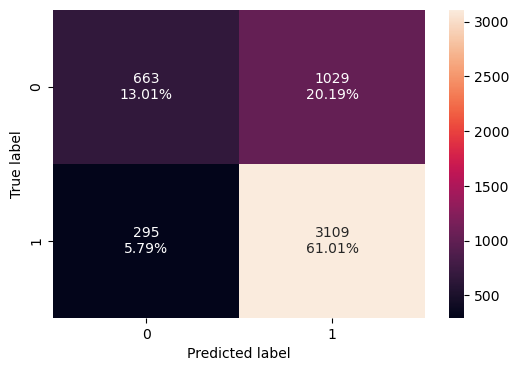

In [267]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import time

# Define the XGBoost model
model = XGBClassifier(random_state=1)

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features used for each tree
}
scoring = metrics.make_scorer(metrics.f1_score)
# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,                  # Number of parameter settings sampled
    scoring=scoring,         # Evaluation metric
    cv=5,                       # Number of cross-validation folds
    random_state=1,             # Ensures reproducibility
    verbose=2,                  # Output progress information
    n_jobs=-1                   # Use all available CPU cores
)

# Measure the time taken for randomized search
start_time = time.time()
random_search.fit(x_train, y_train)
print(f"RandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# Print best parameters and corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Retrieve the best estimator and fit on the training data
XGB_tuned2 = random_search.best_estimator_
XGB_tuned2.fit(x_train, y_train)

# Evaluate model performance on training data
XGB_tuned2_train = model_performance_evaluation(XGB_tuned2, x_train, y_train)
print("Training Performance:")
print(XGB_tuned2_train)

# Evaluate model performance on validation data
XGB_tuned2_test = model_performance_evaluation(XGB_tuned2, x_val, y_val)
print("Testing Performance:")
print(XGB_tuned2_test)

# Create the confusion matrix for the validation data
confusion_matrix_sklearn(XGB_tuned2, x_val, y_val)


### Logistic Regression

#### GridSearchCV

VIF values: 

no_of_employees                       1.003082
prevailing_wage                       1.325935
Age_of_company                        1.004446
continent_Asia                       10.050698
continent_Europe                      6.295099
continent_North America               5.844036
continent_Oceania                     1.292953
continent_South America               2.350710
education_of_employee_Doctorate       1.166691
education_of_employee_High School     1.165840
education_of_employee_Master's        1.258539
has_job_experience_Y                  1.050778
requires_job_training_Y               1.076754
region_of_employment_Midwest         10.804230
region_of_employment_Northeast       15.195906
region_of_employment_South           14.966207
region_of_employment_West            14.394547
unit_of_wage_Month                    1.054644
unit_of_wage_Week                     1.150290
unit_of_wage_Year                     1.496716
full_time_position_Y                  1.111067

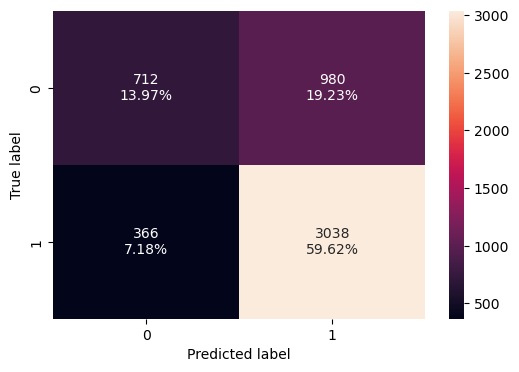

In [270]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm

sc=StandardScaler()
x_train_scaled = pd.DataFrame(sc.fit_transform(x_train),columns = x_train.columns)
x_val_scaled = pd.DataFrame(sc.fit_transform(x_val),columns= x_val.columns)

# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(x_train_scaled.values.astype(float), i) for i in range(x_train_scaled.shape[1])],
    index=x_train_scaled.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

selected_features = np.array((vif_series[vif_series<5]).index)
print(f'Removed_features(due to multicollinearity): { np.array((vif_series[vif_series>=5]).index)}')
x_train_selected = x_train_scaled[selected_features]
x_val_selected = x_val_scaled[selected_features]

x_train_selected = sm.add_constant(x_train_selected)
x_val_selected = sm.add_constant(x_val_selected)

# Reset indices to ensure they are aligned
## The dependent (y_train) and independent variables (x_train_selected) must have the same indices. If the indices differ, statsmodels will raise the error.
x_train_selected = x_train_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

LR_model = sm.Logit(y_train, x_train_selected.astype(float)).fit()

# Remove features with p-values > 0.05
significant_features = LR_model.pvalues[LR_model.pvalues <= 0.05].index
x_train_significant = x_train_selected[significant_features]
x_val_significant = x_val_selected[significant_features]
print(f'Removed_features(due to being statistically insignificant): { np.array(LR_model.pvalues[LR_model.pvalues > 0.05].index)}')

# Refit the model with significant features
LR_model_significant = sm.Logit(y_train, x_train_significant.astype(float)).fit()
print(LR_model_significant.summary())

# Initialize LogisticRegression model
log_tuned1 = LogisticRegression(random_state=1, max_iter=500)

# Hyperparameter grid for tuning
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  # solvers compatible with L1 regularization
}
# Define the scorer for F1 score
scorer = metrics.make_scorer(metrics.f1_score)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=log_tuned1, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=2)
grid_search.fit(x_train_significant, y_train)


# Get the best model and evaluate it
LR_tuned1_significant = grid_search.best_estimator_

# 5. Model Evaluation
# Retrieve the best estimator and fit on the training data

LR_tuned1_significant.fit(x_train_significant, y_train)

# Evaluate model performance on training data
LR_tuned1_significant_train = model_performance_evaluation(LR_tuned1_significant, x_train_significant, y_train)
print("Training Performance:")
print(LR_tuned1_significant_train)

# Evaluate model performance on validation data
LR_tuned1_significant_test = model_performance_evaluation(LR_tuned1_significant, x_val_significant, y_val)
print("Testing Performance:")
print(LR_tuned1_significant_test)

# Create the confusion matrix for the validation data
confusion_matrix_sklearn(LR_tuned1_significant, x_val_significant, y_val)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training Performance:
   Accuracy    Recall  Precision        F1
0  0.736329  0.880215   0.761933  0.816814
Testing Performance:
   Accuracy    Recall  Precision       F1
0  0.738226  0.878085   0.764841  0.81756


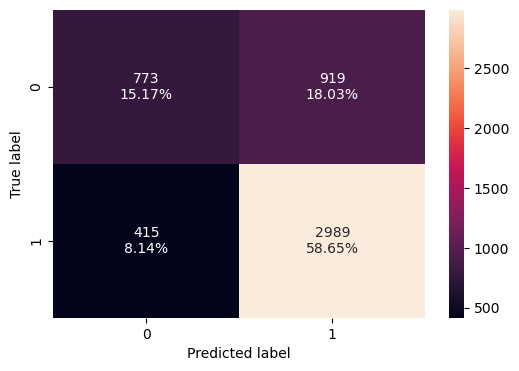

In [271]:
# Initialize LogisticRegression model
log_tuned1 = LogisticRegression(random_state=1, max_iter=500)

# Hyperparameter grid for tuning
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  # solvers compatible with L1 regularization
}
# Define the scorer for F1 score
scorer = metrics.make_scorer(metrics.f1_score)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=log_tuned1, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)


# Get the best model and evaluate it
LR_tuned1 = grid_search.best_estimator_
# 5. Model Evaluation
# Retrieve the best estimator and fit on the training data

LR_tuned1.fit(x_train, y_train)

# Evaluate model performance on training data
LR_tuned1_train = model_performance_evaluation(LR_tuned1, x_train, y_train)
print("Training Performance:")
print(LR_tuned1_train)

# Evaluate model performance on validation data
LR_tuned1_test = model_performance_evaluation(LR_tuned1, x_val, y_val)
print("Testing Performance:")
print(LR_tuned1_test)

# Create the confusion matrix for the validation data
confusion_matrix_sklearn(LR_tuned1, x_val, y_val)

#### RandomizedSearchCV

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Training Performance:
   Accuracy    Recall  Precision        F1
0  0.736329  0.880215   0.761933  0.816814
Testing Performance:
   Accuracy    Recall  Precision       F1
0  0.738226  0.878085   0.764841  0.81756


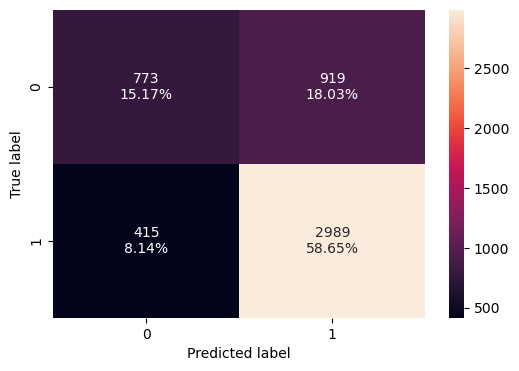

In [273]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

# Initialize LogisticRegression model
log_tuned2 = LogisticRegression(random_state=1, max_iter=500)

# Hyperparameter distribution for randomized search
param_dist = {
    'penalty': ['l2', 'l1'], 
    'C': np.logspace(-3, 3, 7),  # Logarithmically spaced values for C
    'solver': ['liblinear', 'saga']  # solvers compatible with L1 regularization
}

# Define the scorer for F1 score
scorer = metrics.make_scorer(metrics.f1_score)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=log_tuned2, 
    param_distributions=param_dist, 
    n_iter=50, 
    scoring=scorer, 
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
    random_state=1
)

# Fit the randomized search on training data
random_search.fit(x_train, y_train)

# Get the best model and evaluate it
LR_tuned2 = random_search.best_estimator_

# Fit the best estimator on training data
LR_tuned2.fit(x_train, y_train)

# Evaluate model performance on training data
LR_tuned2_train = model_performance_evaluation(LR_tuned2, x_train, y_train)
print("Training Performance:")
print(LR_tuned2_train)

# Evaluate model performance on validation data
LR_tuned2_test = model_performance_evaluation(LR_tuned2, x_val, y_val)
print("Testing Performance:")
print(LR_tuned2_test)

# Create the confusion matrix for the validation data
confusion_matrix_sklearn(LR_tuned2, x_val, y_val)


In [274]:
print(LR_tuned1)

LogisticRegression(C=1, max_iter=500, penalty='l1', random_state=1,
                   solver='liblinear')


In [275]:
print(LR_tuned2)

LogisticRegression(max_iter=500, penalty='l1', random_state=1,
                   solver='liblinear')


## Stacking Model

**Now, let's build a stacking model with the tuned models - Gradient Boosting Classifier, AdaBoost, and Logistic Regression, then use XGBoost to get the final prediction.**

Training Performance:
   Accuracy    Recall  Precision        F1
0  0.759419  0.885994   0.782526  0.831052
Testing Performance:
   Accuracy    Recall  Precision        F1
0  0.736068  0.867509   0.767611  0.814508


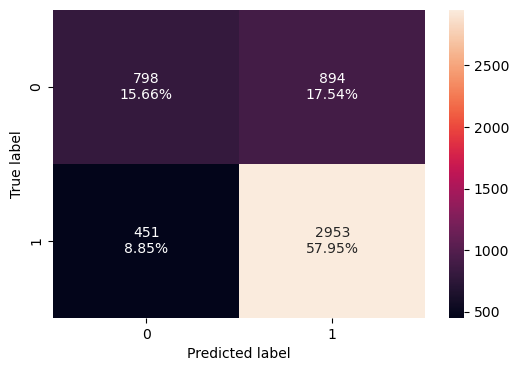

In [278]:
estimators = [('Gradient Boosting Classifier',GB_tuned1), ('AdaBoost',AB_tuned1), ('Logistic Regression',LR_tuned1_significant)]
final_estimator = XGBClassifier(random_state=1)
stacking_estimator = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(x_train, y_train)
# Evaluate model performance on training data
stacking_estimator_train = model_performance_evaluation(stacking_estimator, x_train, y_train)
print("Training Performance:")
print(stacking_estimator_train)

# Evaluate model performance on validation data
stacking_estimator_test = model_performance_evaluation(stacking_estimator, x_val, y_val)
print("Testing Performance:")
print(stacking_estimator_test)

# Create the confusion matrix for the validation data
confusion_matrix_sklearn(stacking_estimator, x_val, y_val)

### Model Performance Comparison and Final Model Selection

#### Training

In [281]:
# Combine all models' training performance
models_df = pd.concat(
    [
        GB_tuned1_train.T,
        GB_tuned2_train.T,
        AB_tuned1_train.T,
        AB_tuned2_train.T,
        XGB_tuned1_train.T,
        XGB_tuned2_train.T,
        LR_tuned1_significant_train.T,
        LR_tuned1_train.T,
        LR_tuned2_train.T,
        stacking_estimator_train.T,
    ],
    axis=1
)

# Define appropriate column names (must match the number of columns in `models_df`)
models_df.columns = [
    "Gradient Boost Tuned (GridSearchCV)",
    "Gradient Boost Tuned (RandomizedSearchCV)",
    "Adaboost Tuned (GridSearchCV)",
    "Adaboost Tuned (RandomizedSearchCV)",
    "XGB Tuned (GridSearchCV)",
    "XGB Tuned (RandomizedSearchCV)",
    "Logistic Regression with Significant Features",
    "Logistic Regression Tuned (GridSearchCV)",
    "Logistic Regression Tuned (RandomizedSearchCV)",
    "Stacked Model",
]

# Display the performance comparison DataFrame
print("Model performance comparison:")
models_df


Model performance comparison:


,Gradient Boost Tuned (GridSearchCV),Gradient Boost Tuned (RandomizedSearchCV),Adaboost Tuned (GridSearchCV),Adaboost Tuned (RandomizedSearchCV),XGB Tuned (GridSearchCV),XGB Tuned (RandomizedSearchCV),Logistic Regression with Significant Features,Logistic Regression Tuned (GridSearchCV),Logistic Regression Tuned (RandomizedSearchCV),Stacked Model
Accuracy,0.757718,0.768250,0.751897,0.757980,0.748299,0.746010,0.736983,0.736329,0.736329,0.759419
Recall,0.923506,0.886778,0.883350,0.884231,0.920274,0.918413,0.895788,0.880215,0.880215,0.885994
Precision,0.763358,0.791364,0.776095,0.781916,0.755913,0.754567,0.755680,0.761933,0.761933,0.782526
F1,0.835830,0.836359,0.826256,0.829932,0.830035,0.828467,0.819791,0.816814,0.816814,0.831052


In [282]:
# Combine all models' testing performance
models_df_test = pd.concat(
    [
        GB_tuned1_test.T,
        GB_tuned2_test.T,
        AB_tuned1_test.T,
        AB_tuned2_test.T,
        XGB_tuned1_test.T,
        XGB_tuned2_test.T,
        LR_tuned1_significant_test.T,
        LR_tuned1_test.T,
        LR_tuned2_test.T,
        stacking_estimator_test.T,
    ],
    axis=1
)

# Define appropriate column names (must match the number of columns in `models_df_test`)
models_df_test.columns = [
    "Gradient Boost Tuned (GridSearchCV)",
    "Gradient Boost Tuned (RandomizedSearchCV)",
    "Adaboost Tuned (GridSearchCV)",
    "Adaboost Tuned (RandomizedSearchCV)",
    "XGB Tuned (GridSearchCV)",
    "XGB Tuned (RandomizedSearchCV)",
    "Logistic Regression with Significant Features",
    "Logistic Regression Tuned (GridSearchCV)",
    "Logistic Regression Tuned (RandomizedSearchCV)",
    "Stacked Model",
]

# Display the performance comparison DataFrame for testing
print("Model performance comparison on test data:")
models_df_test


Model performance comparison on test data:


,Gradient Boost Tuned (GridSearchCV),Gradient Boost Tuned (RandomizedSearchCV),Adaboost Tuned (GridSearchCV),Adaboost Tuned (RandomizedSearchCV),XGB Tuned (GridSearchCV),XGB Tuned (RandomizedSearchCV),Logistic Regression with Significant Features,Logistic Regression Tuned (GridSearchCV),Logistic Regression Tuned (RandomizedSearchCV),Stacked Model
Accuracy,0.740973,0.744505,0.748430,0.745683,0.739207,0.740188,0.735871,0.738226,0.738226,0.736068
Recall,0.912456,0.866921,0.877203,0.870153,0.912750,0.913337,0.892479,0.878085,0.878085,0.867509
Precision,0.752422,0.776579,0.775584,0.776205,0.750664,0.751329,0.756098,0.764841,0.764841,0.767611
F1,0.824748,0.819267,0.823270,0.820499,0.823810,0.824450,0.818647,0.817560,0.817560,0.814508


<Figure size 1000x800 with 0 Axes>

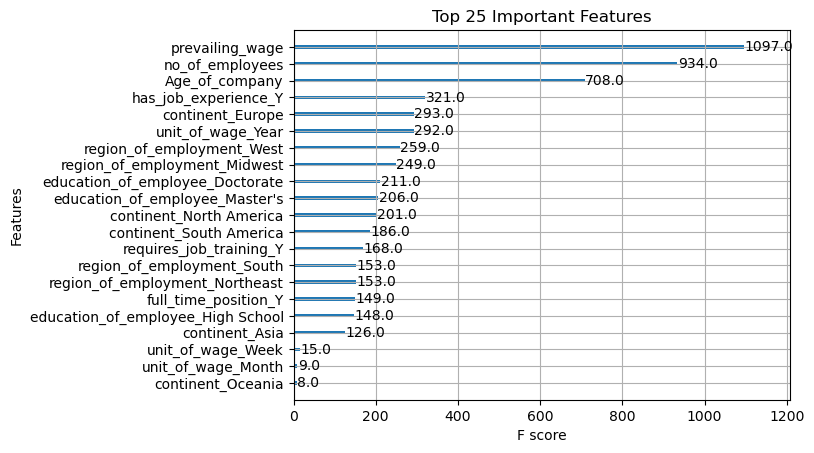

In [299]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Assuming `XGB_tuned1` is your trained XGBoost model

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(XGB_tuned1, importance_type='weight', max_num_features=25)
plt.title('Top 25 Important Features')
# plt.show()
plt.savefig(f'D:/Data Science/Module-5_Machine-Learning-2/images_for_project/imporatnce.jpg', dpi=300, bbox_inches='tight')

In [284]:
print(f'Final Model: {XGB_tuned1}')

Final Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)


**Performance of the best model on the test set**

Testing Performance:
   Accuracy    Recall  Precision        F1
0  0.740188  0.918038     0.7494  0.825191


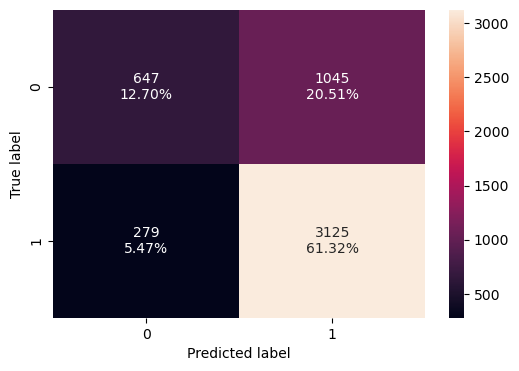

In [286]:
# Evaluate model performance on validation data
Final_model_test = model_performance_evaluation(XGB_tuned1, x_test, y_test)
print("Testing Performance:")
print(Final_model_test)

# Create the confusion matrix for the validation data
confusion_matrix_sklearn(XGB_tuned1, x_test, y_test)

# **Actionable Insights and Business Recommendations**

We can use this model to facilitate the process of visa approvals 83% of the times correctly.

## Insights from Analysis

- **Year of Establishment:** Older firms (pre-1950) show lower certification rates. Most applications come from companies founded post-1950.  
- **Prevailing Wage:** Higher wages lead to more certifications. Hourly wages have higher denial rates, while yearly wages dominate the dataset.  
- **Continent:** Asia leads in applications, followed by Europe and North America. Certification rates are highest in North America and Europe.  
- **Education:** Bachelor's degree holders dominate applications. Higher degrees like doctorates correlate with better certifications.  
- **Job Experience:** Applicants with experience (58.1%) and no training needs have better certification rates.  
- **Region:** Northeast leads certifications, while the Midwest shows the highest denial rates. The Island region has the lowest denial rate but few applications.  
- **Business Size:** Larger companies have higher certification rates. Smaller firms face more denials, likely due to compliance challenges.  
- **Full-Time Roles:** Full-time positions (89.4%) have better approval odds than part-time roles.  

## Business Recommendations

- **Prioritize High Wages:** Focus on higher prevailing wages for better approval odds.  
- **Minimize Training Needs:** Reduce job training requirements or set up in-house training programs before applying.  
- **Leverage Continent Data:** Strengthen recruitment in Asia, North America, and Europe while expanding outreach to underrepresented continents.  
- **Promote Education:** Recruit candidates with at least a Bachelor's degree and encourage higher education to boost approvals.  
- **Address Regional Trends:** Focus on regions with high approval rates, like the Northeast. Improve compliance in the Midwest to reduce denials.  
- **Support Small Businesses:** Help smaller firms align with compliance standards to improve their certification success.  
- **Encourage Full-Time Roles:** Favor full-time positions to increase approval chances.  
- **Use Predictive Models:** Implement machine learning to automate applicant shortlisting, saving time and improving success rates.  
